In [326]:
import numpy as np
import pandas as pd

In [327]:
df=pd.read_csv('spam.csv',encoding='latin-1')

In [328]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4415,ham,V skint too but fancied few bevies.waz gona go...,NaN,NaN,NaN
1743,ham,I love to wine and dine my lady!,NaN,NaN,NaN
2483,ham,Mm have some kanji dont eat anything heavy ok,NaN,NaN,NaN
3175,ham,Havent still waitin as usual... ÌÏ come back s...,NaN,NaN,NaN
3302,ham,"It'll be tough, but I'll do what I have to",NaN,NaN,NaN


In [329]:
df.shape

(5572, 5)

In [330]:
    # 1 Data cleaning
    # 2. EDA
    # 3. Text preprocessing
    # 4. Model building
    # 5. Evaluation
    # 6. Website
    # 7. Deploy

## 1. Data Cleaning

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [332]:
# drop last 3 cols
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [333]:
df.sample(5)

,v1,v2
4973,ham,Aiyo u so poor thing... Then u dun wan 2 eat? ...
5384,ham,How are you babes. Hope your doing ok. I had a...
301,ham,"Shit that is really shocking and scary, cant i..."
2430,ham,How was txting and driving
4327,spam,Congrats! 2 mobile 3G Videophones R yours. cal...


In [334]:
# rename the cols
df.rename(columns={'v1': 'target','v2':'text'},inplace = True)
df.sample(5)

,target,text
4435,ham,"House-Maid is the murderer, coz the man was mu..."
3882,ham,Gumby's has a special where a &lt;#&gt; \ che...
5522,ham,Thats cool. I want to please you...
2228,ham,Those were my exact intentions
2160,ham,No. Its not specialisation. Can work but its s...


In [335]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [336]:
df['target']=encoder.fit_transform(df['target'])

In [337]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [338]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [339]:
# check for duplicate values
df.duplicated().sum()

403

In [340]:
# remove duplicates
df=df.drop_duplicates(keep = 'first')

In [341]:
df.duplicated().sum()

0

## 2.EDA

In [342]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [343]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

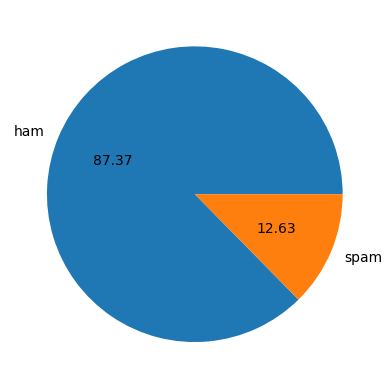

In [344]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [345]:
# data is imbalanced

In [346]:
import nltk

In [347]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pranita\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [348]:
df['num_characters']=df['text'].apply(len)

In [349]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [350]:
# num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [351]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [352]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [353]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [354]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [355]:
# ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [356]:
# spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [357]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

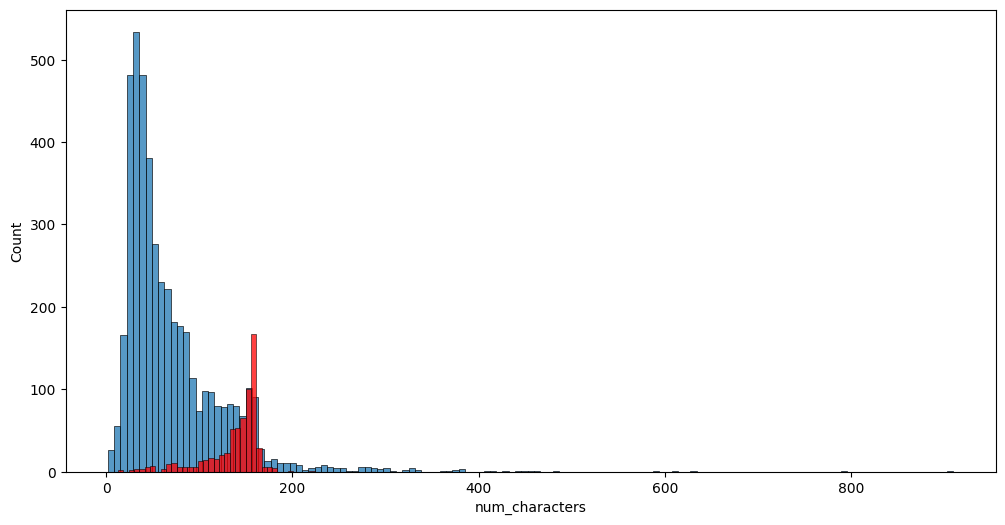

In [358]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

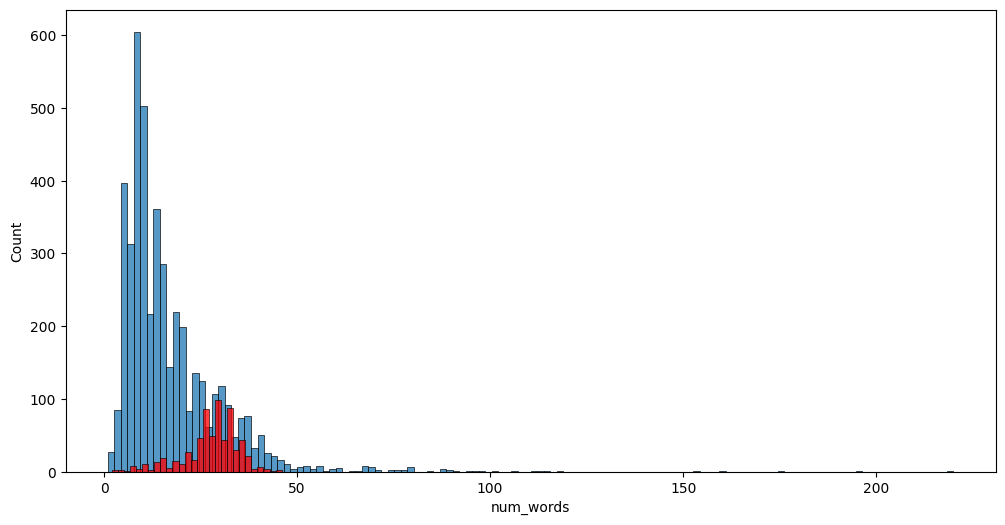

In [359]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

C:\Users\Pranita\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Pranita\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Pranita\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


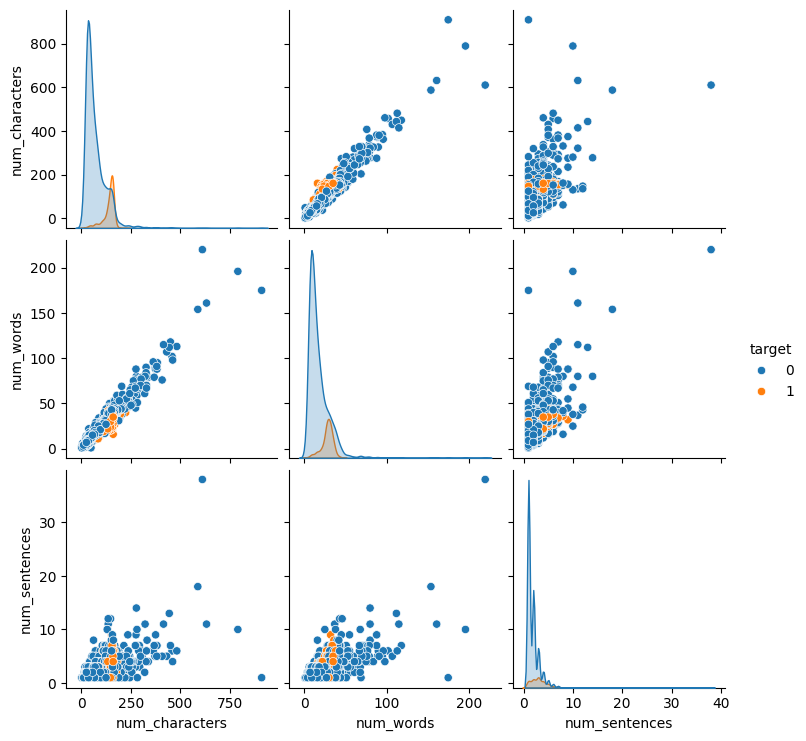

In [360]:
sns.pairplot(df,hue='target')

In [361]:
# sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing


In [362]:
# Lower case
# Tokenization
# Removing special characters
# Removing stopwords and punctuations
# Stemming

In [363]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not  in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [364]:
from nltk.corpus import stopwords
# stopwords.words('english')

In [365]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [366]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [367]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [368]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loveing')

'love'

In [369]:
df['transformed_text']=df['text'].apply(transform_text)

In [370]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [371]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size= 10, background_color='white')


In [372]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))

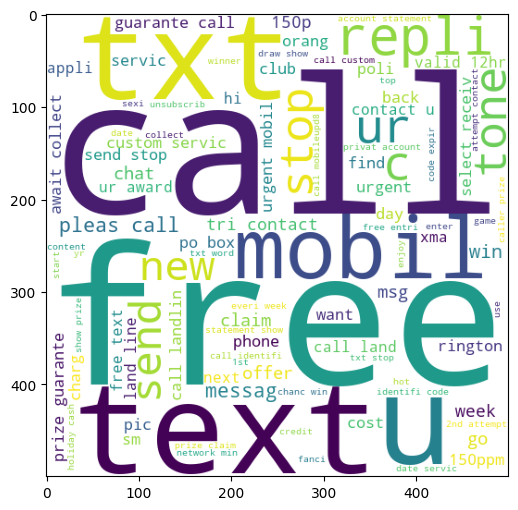

In [373]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [374]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

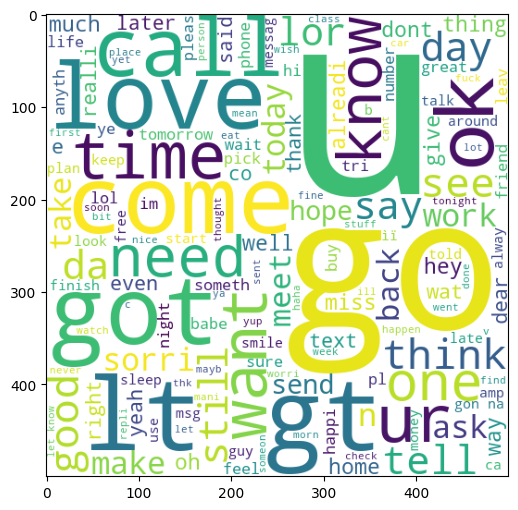

In [375]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [376]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].to_list():
    for word in msg.split():
        spam_corpus.append(word)

In [377]:
len(spam_corpus)

9939

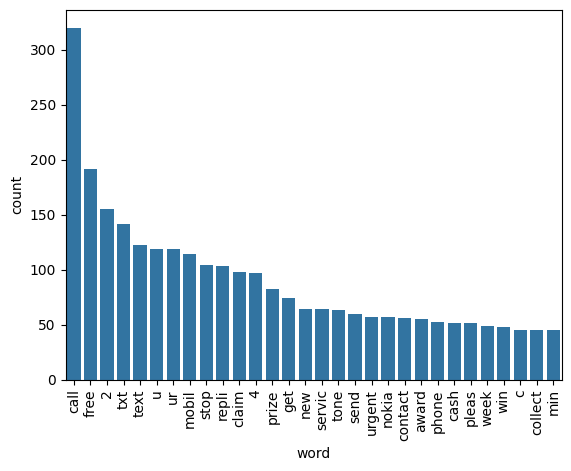

In [378]:
from collections import Counter
spam_counter=Counter(spam_corpus)
most_common_30= spam_counter.most_common(30)
new_df = pd.DataFrame(most_common_30,columns=['word','count'])
sns.barplot(data=new_df,x='word',y='count')
plt.xticks(rotation='vertical')
plt.show()

In [379]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].to_list():
    for word in msg.split():
        ham_corpus.append(word)

In [380]:
len(ham_corpus)

35404

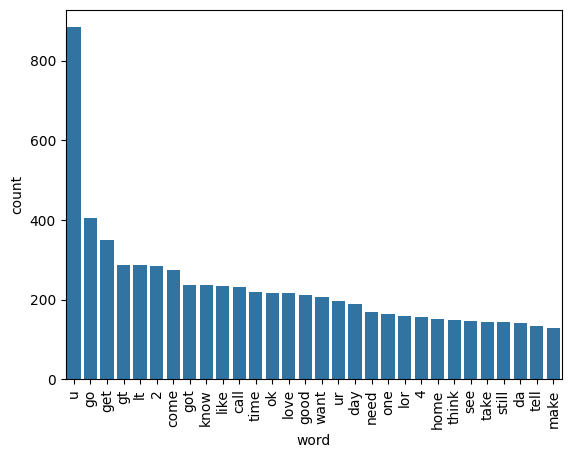

In [381]:
from collections import Counter
ham_counter=Counter(ham_corpus)
most_common_30= ham_counter.most_common(30)
new_df1 = pd.DataFrame(most_common_30,columns=['word','count'])
sns.barplot(data=new_df1,x='word',y='count')
plt.xticks(rotation='vertical')
plt.show()

## 4. Model building

In [409]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [410]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [411]:
X.shape

(5169, 6708)

In [412]:
y = df['target'].values

In [413]:
y.shape

(5169,)

In [414]:
from sklearn.model_selection import train_test_split


In [415]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=2)


In [416]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [417]:
gnb= GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [418]:

gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [419]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [420]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [ ]:
# tfidf--->mnb